# Quick test notebook for MRS

In [2]:
# We import these lines for debugging purposes, only works on Jupyter Notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import numpy as np
from scipy.stats import norm

from rocketpy import MonteCarlo
from rocketpy.simulation.multivariate_rejection_sampler import (
    MultivariateRejectionSampler,
)

In [4]:
monte_carlo_filepath = (
    "monte_carlo_analysis/monte_carlo_analysis_outputs/monte_carlo_class_example"
)
mrs_filepath = "monte_carlo_analysis/monte_carlo_analysis_outputs/mrs"
old_mass_pdf = norm(15.426, 0.5).pdf
new_mass_pdf = norm(15, 0.5).pdf
distribution_dict = {
    "mass": (old_mass_pdf, new_mass_pdf),
}
mrs = MultivariateRejectionSampler(
    monte_carlo_filepath=monte_carlo_filepath,
    mrs_filepath=mrs_filepath,
)

In [5]:
mrs.sample(distribution_dict=distribution_dict)

In [6]:
mrs_results = MonteCarlo(mrs_filepath, None, None, None)

The following input file was imported: monte_carlo_analysis/monte_carlo_analysis_outputs/mrs.inputs.txt
A total of 113 simulations results were loaded from the following output file: monte_carlo_analysis/monte_carlo_analysis_outputs/mrs.outputs.txt

The following error file was imported: monte_carlo_analysis/monte_carlo_analysis_outputs/mrs.errors.txt


/home/lprates/Desktop/Work/RocketPy/RocketPy/rocketpy/simulation/monte_carlo.py:133: UserWarning: This class is still under testing and some attributes may be changed in next versions
  warnings.warn(


In [7]:
mrs_results.import_results()

A total of 113 simulations results were loaded from the following output file: monte_carlo_analysis/monte_carlo_analysis_outputs/mrs.outputs.txt

The following input file was imported: monte_carlo_analysis/monte_carlo_analysis_outputs/mrs.inputs.txt
The following error file was imported: monte_carlo_analysis/monte_carlo_analysis_outputs/mrs.errors.txt


In [8]:
mrs_mass_list = []
for single_input_dict in mrs_results.inputs_log:
    mrs_mass_list.append(single_input_dict["mass"])

print(f"MRS mass mean after resample: {np.mean(mrs_mass_list)}")
print(f"MRS mass std after resample: {np.std(mrs_mass_list)}")

MRS mass mean after resample: 15.027532656859725
MRS mass std after resample: 0.4560120026589398


In [9]:
mrs.expected_sample_size

np.float64(111.0)

In [10]:
original_results = MonteCarlo(monte_carlo_filepath, None, None, None)

The following input file was imported: monte_carlo_analysis/monte_carlo_analysis_outputs/monte_carlo_class_example.inputs.txt
A total of 1000 simulations results were loaded from the following output file: monte_carlo_analysis/monte_carlo_analysis_outputs/monte_carlo_class_example.outputs.txt

The following error file was imported: monte_carlo_analysis/monte_carlo_analysis_outputs/monte_carlo_class_example.errors.txt


In [11]:
mrs_results.compare_info(original_results)

Comparison of Monte Carlo Simulation by RocketPy
Original data Source:  monte_carlo_analysis/monte_carlo_analysis_outputs/mrs
Comparison data Source:  monte_carlo_analysis/monte_carlo_analysis_outputs/monte_carlo_class_example
Original number of simulations:  113
Comparison number of simulations:  1000
Results: 

                          Parameter          Source            Mean          Median       Std. Dev.    95% PI Lower    95% PI Upper
--------------------------------------------------------------------------------------------------------------------------------------------
           initial_stability_margin        Original           2.556           2.568           0.086           2.392           2.710
           initial_stability_margin           Other           2.596           2.596           0.085           2.425           2.763
                             apogee        Original        3203.634        3367.672         680.251        1855.810        4155.730
                

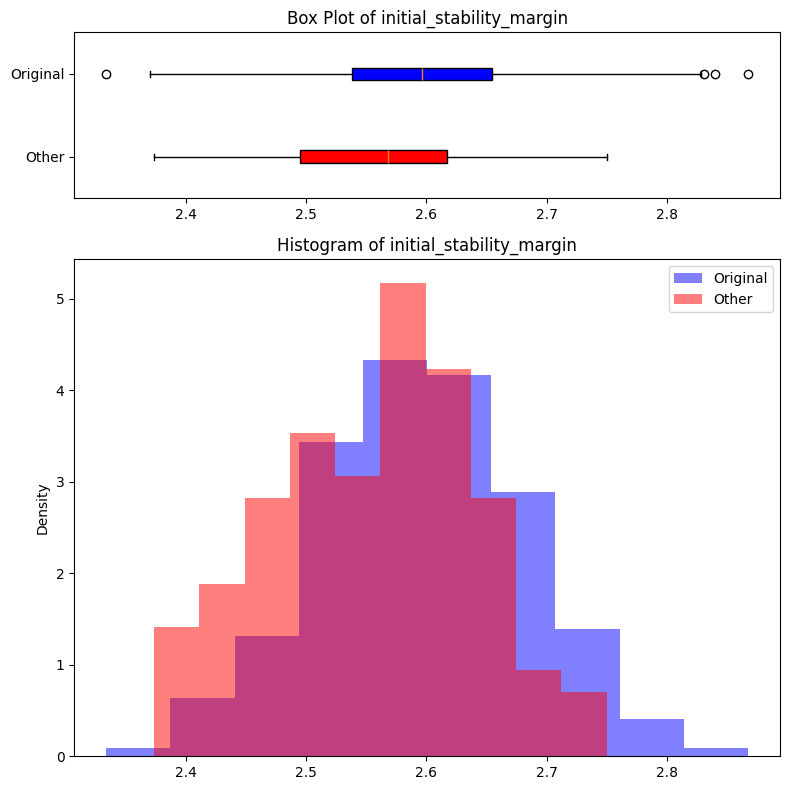

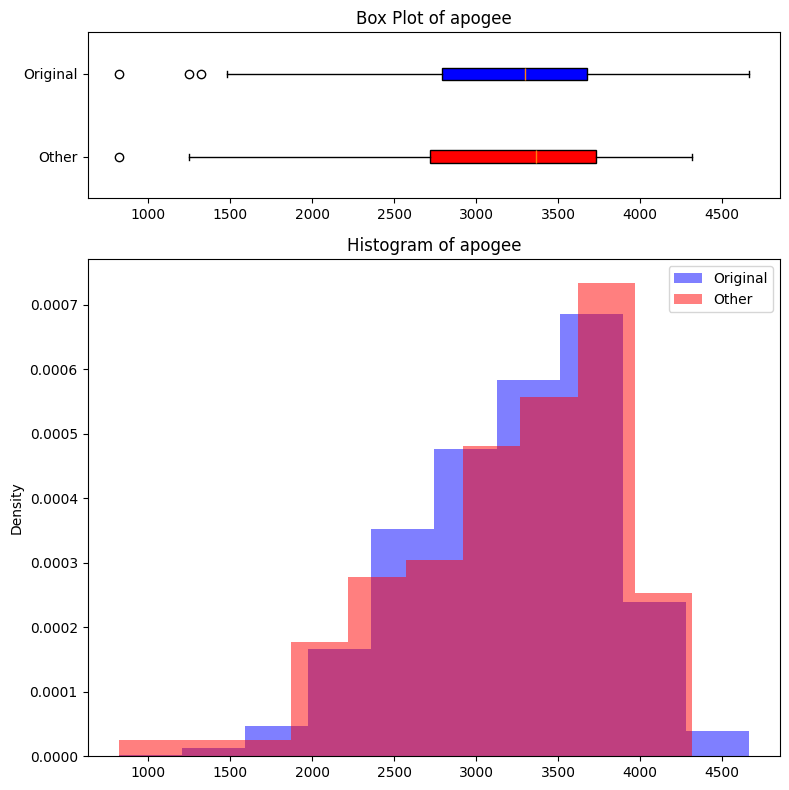

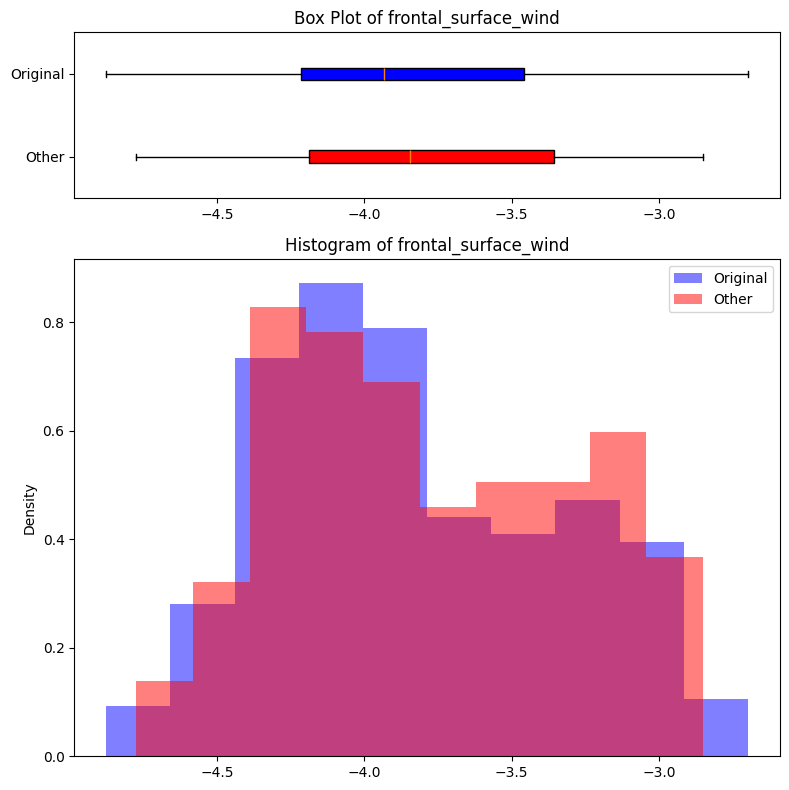

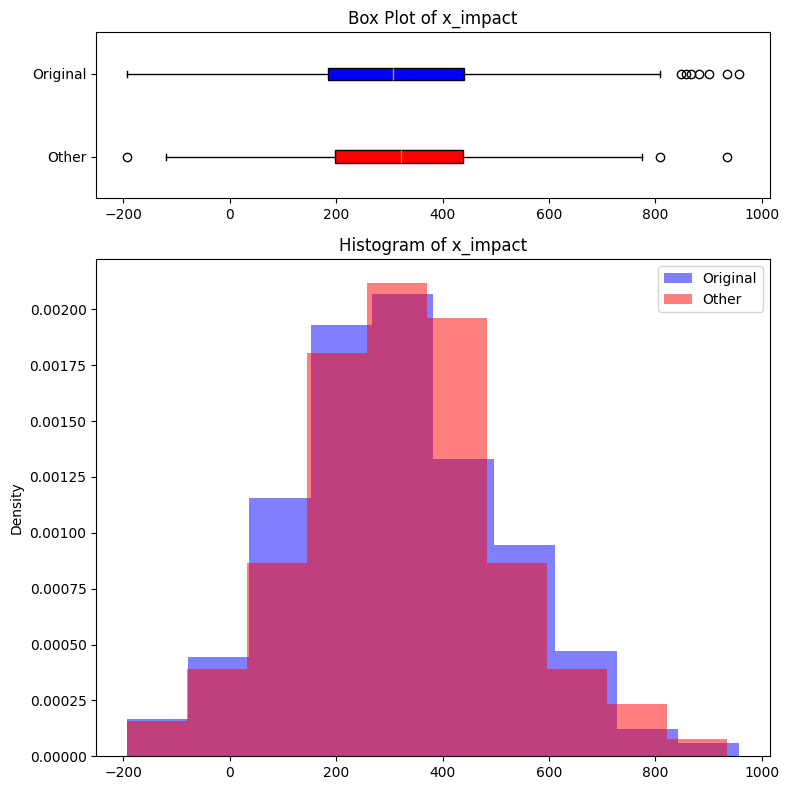

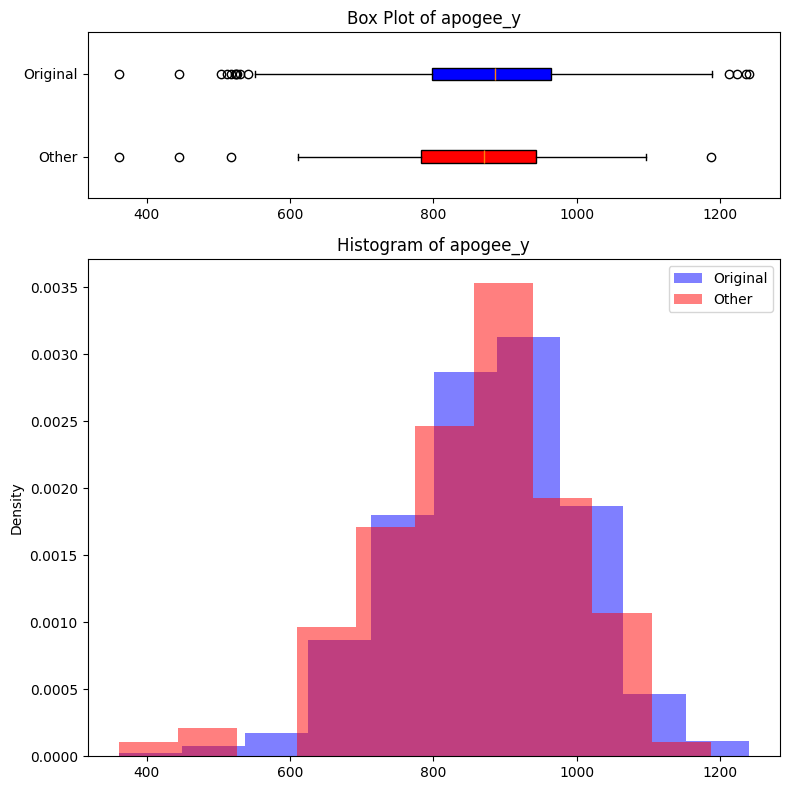

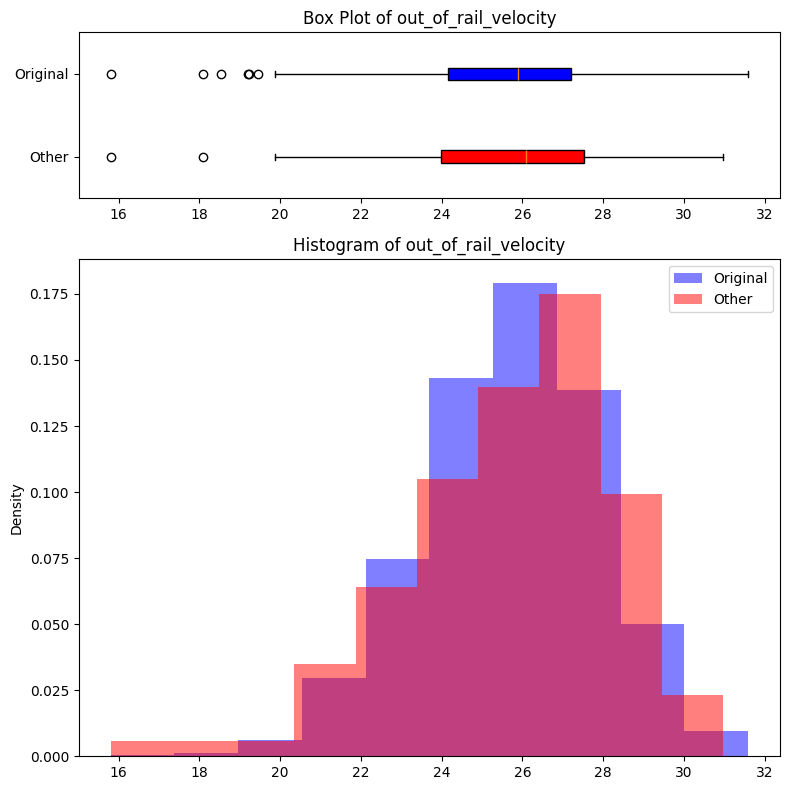

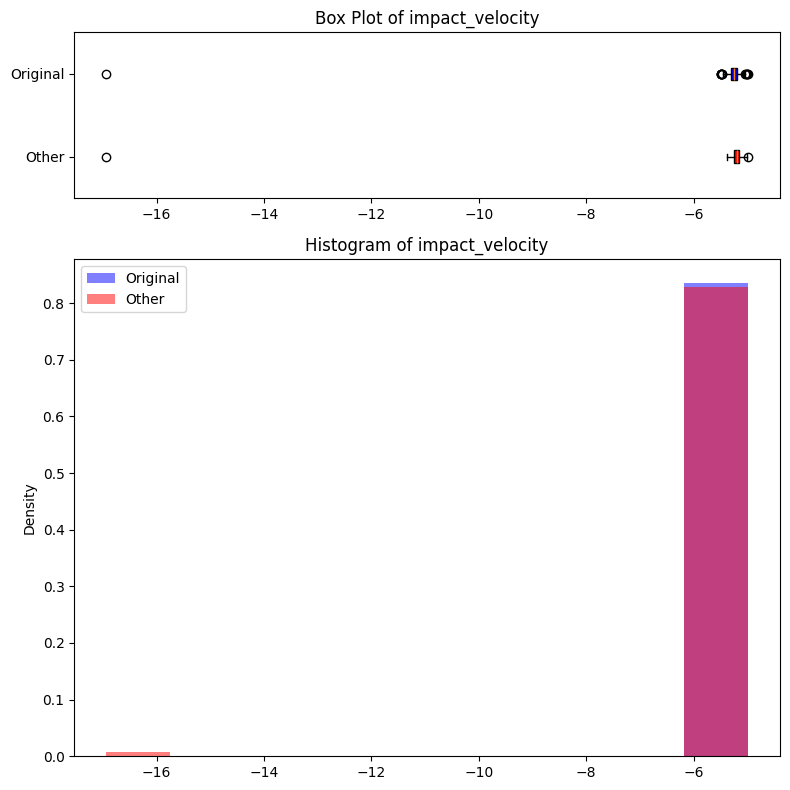

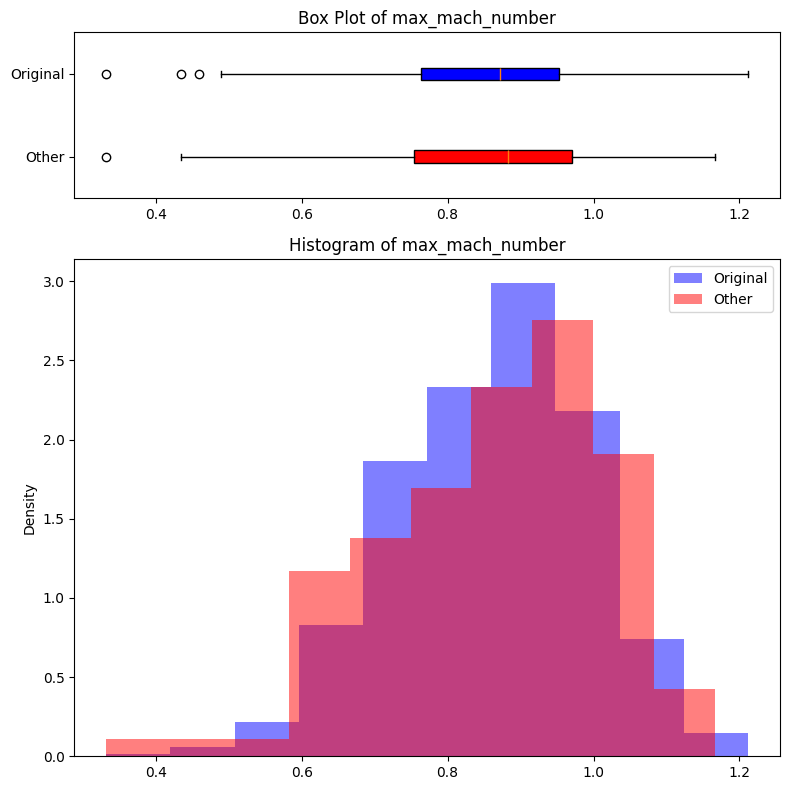

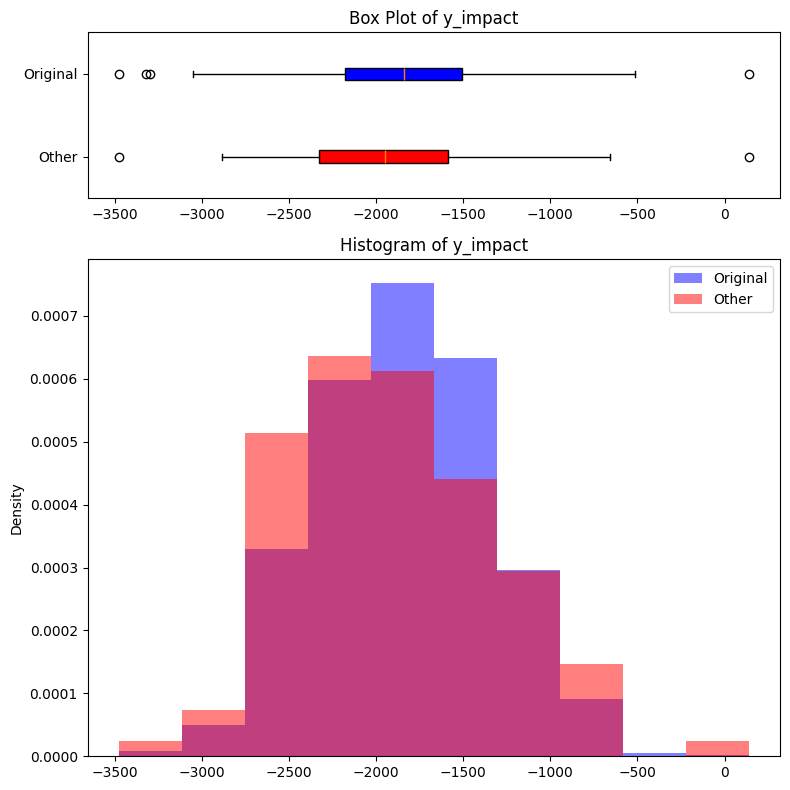

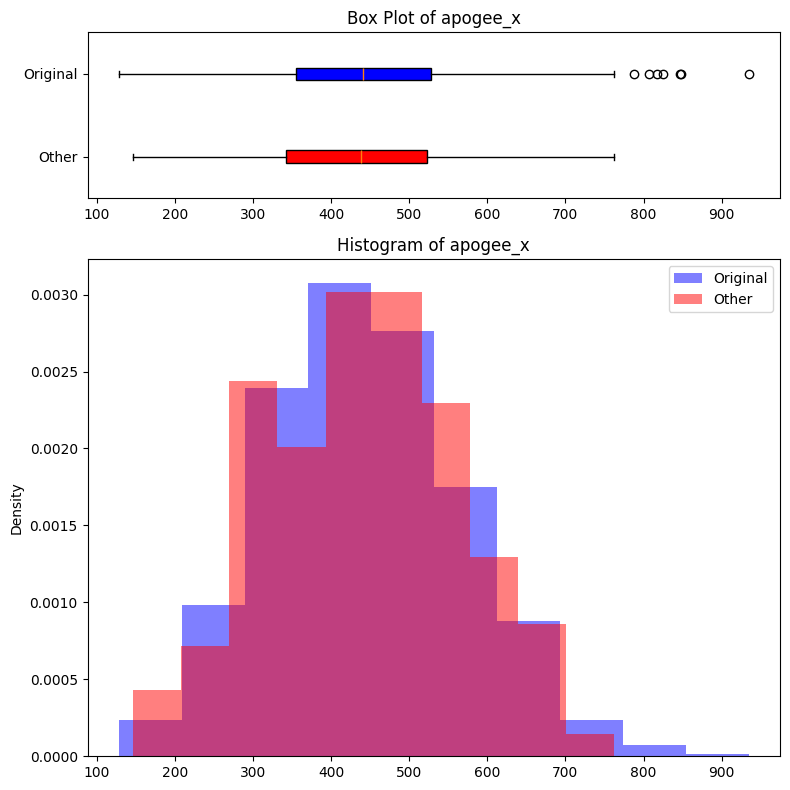

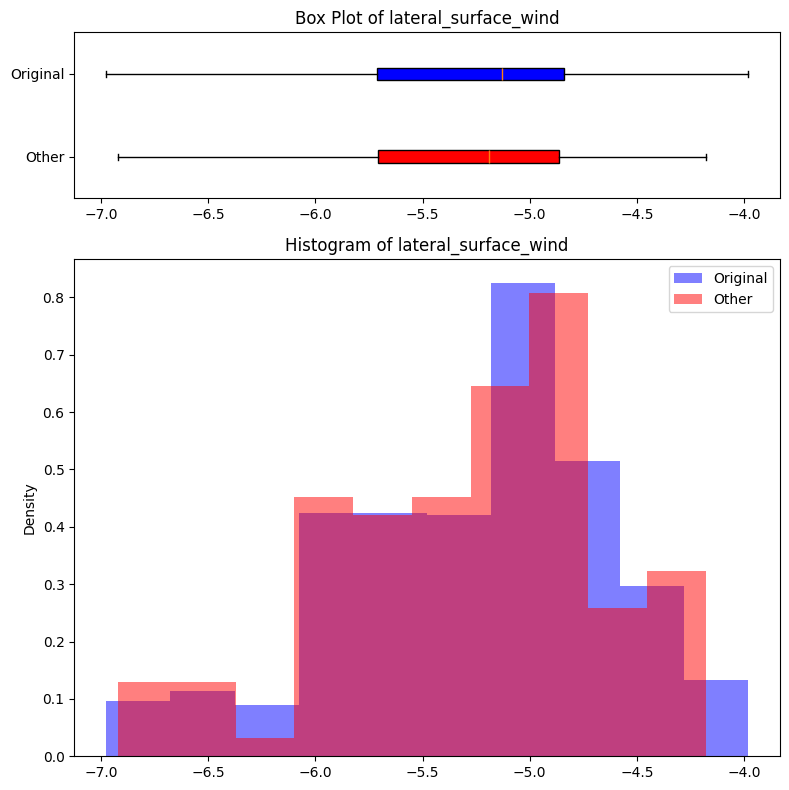

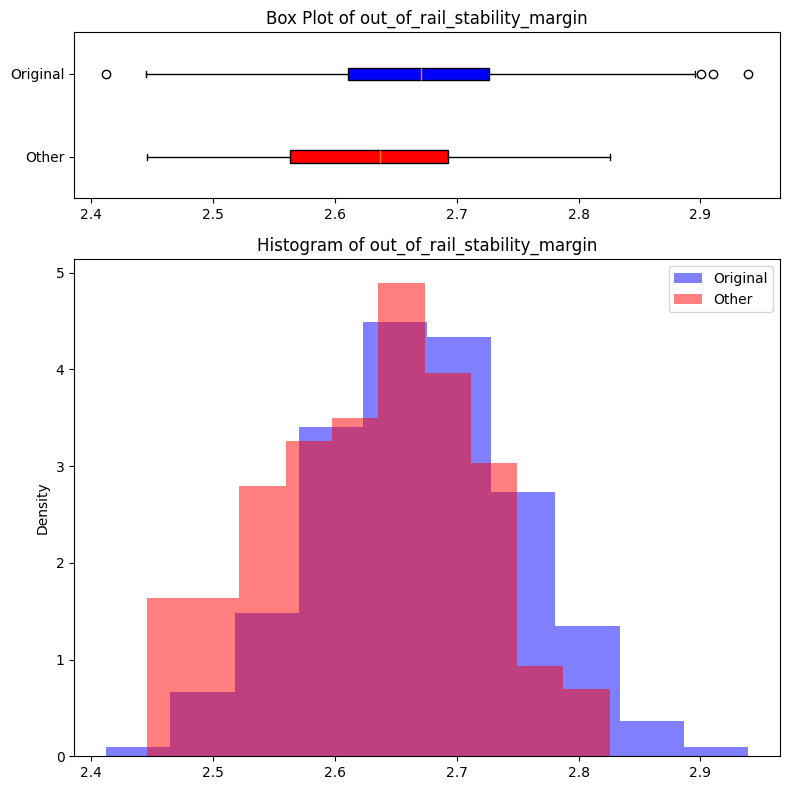

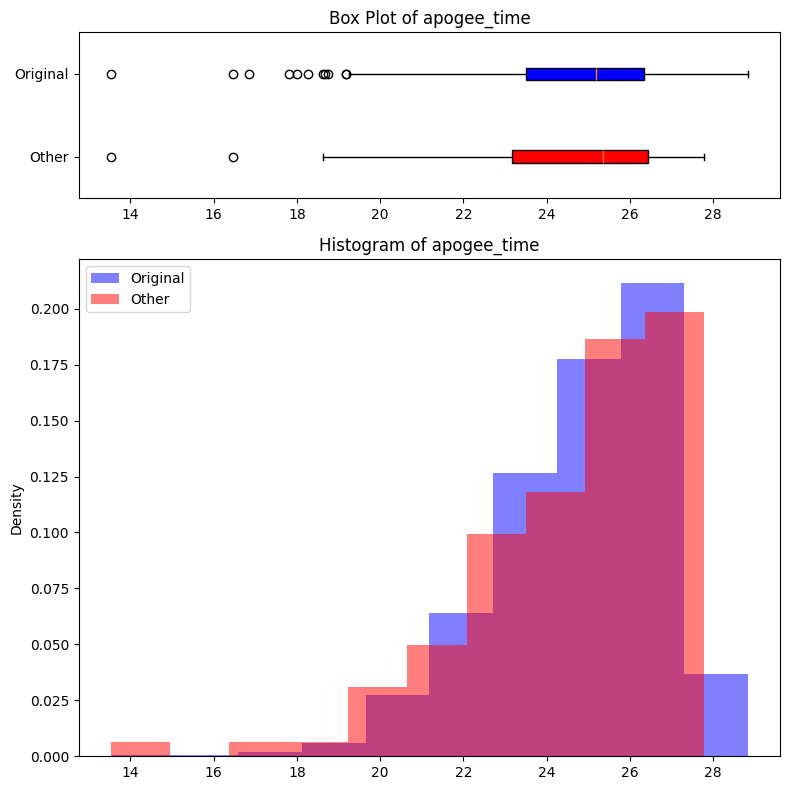

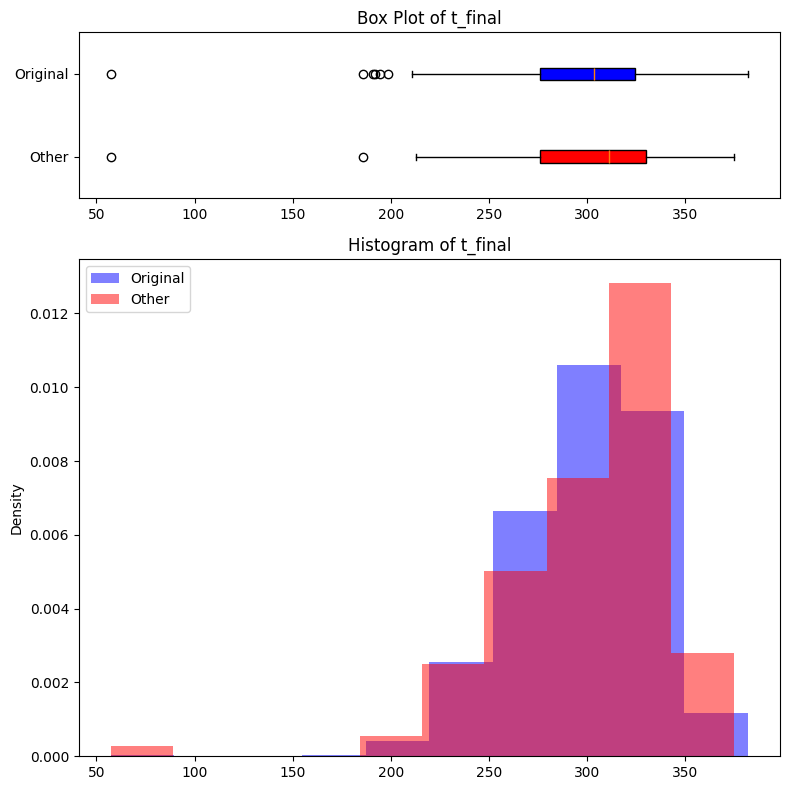

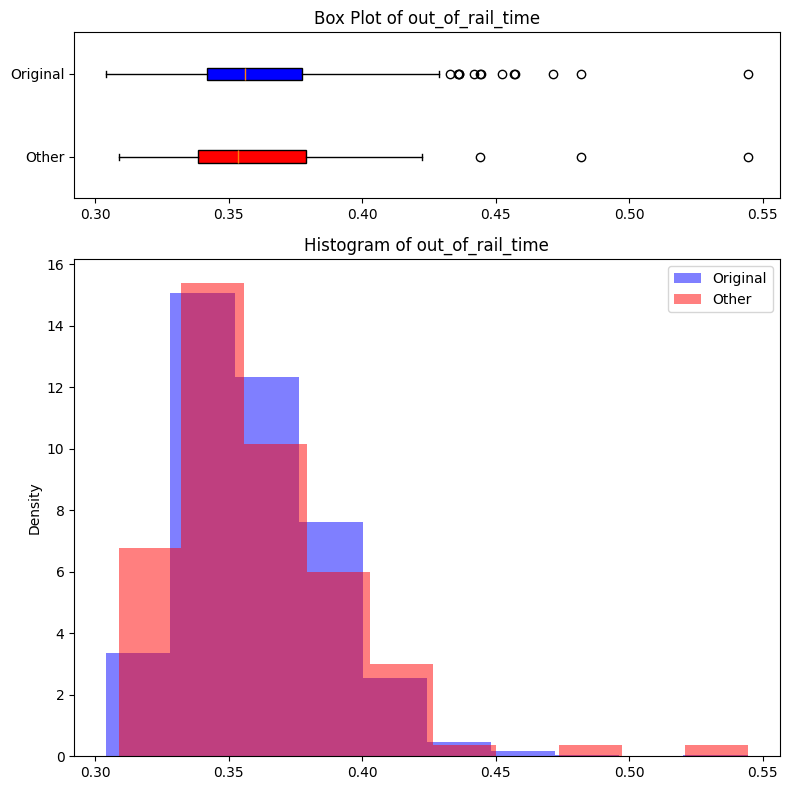

In [12]:
original_results.compare_plots(mrs_results)

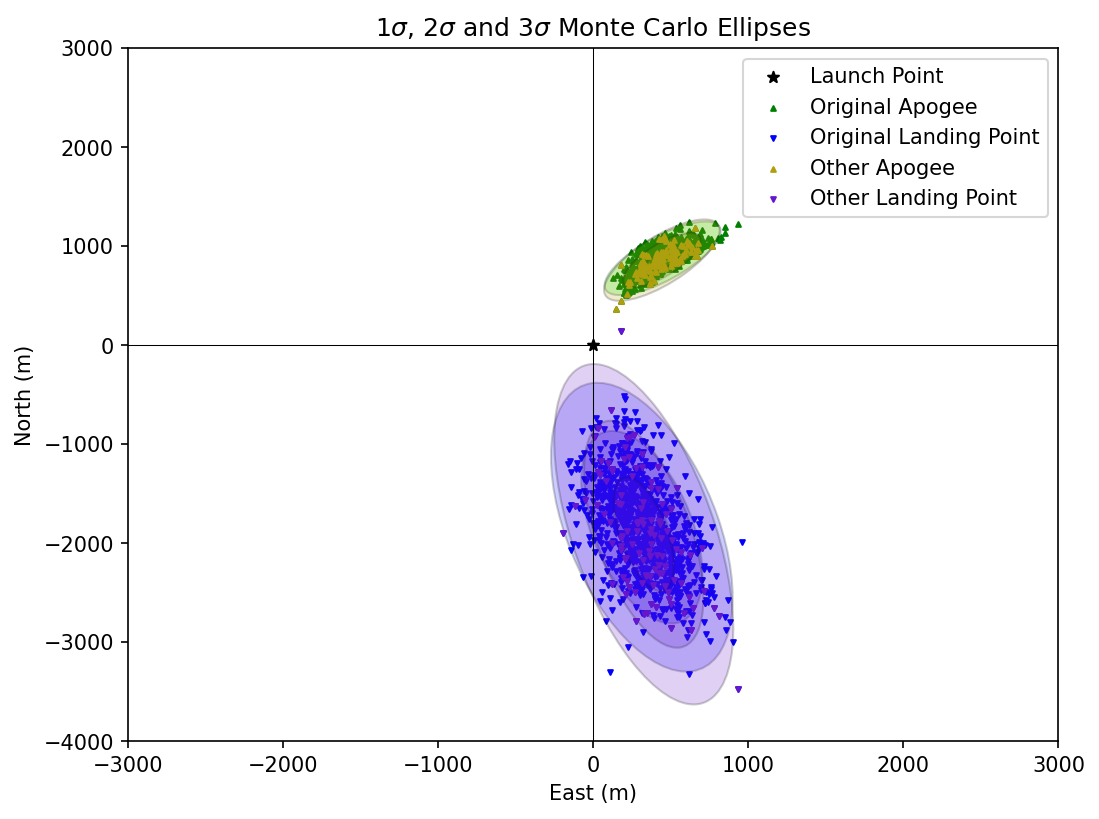

In [13]:
original_results.compare_ellipses(mrs_results, ylim=(-4000, 3000))